### **<u>TEMPERATURE DATA ANALYSIS FOR ANN ARBOR, MICHIGAN</u>  *(TASKS 1 & 2)***

The complete code block below analyzes and plots temperature records from year 2005-2014 and also overlays 2015 record-breaking data for Ann Arbor, Michigan. 

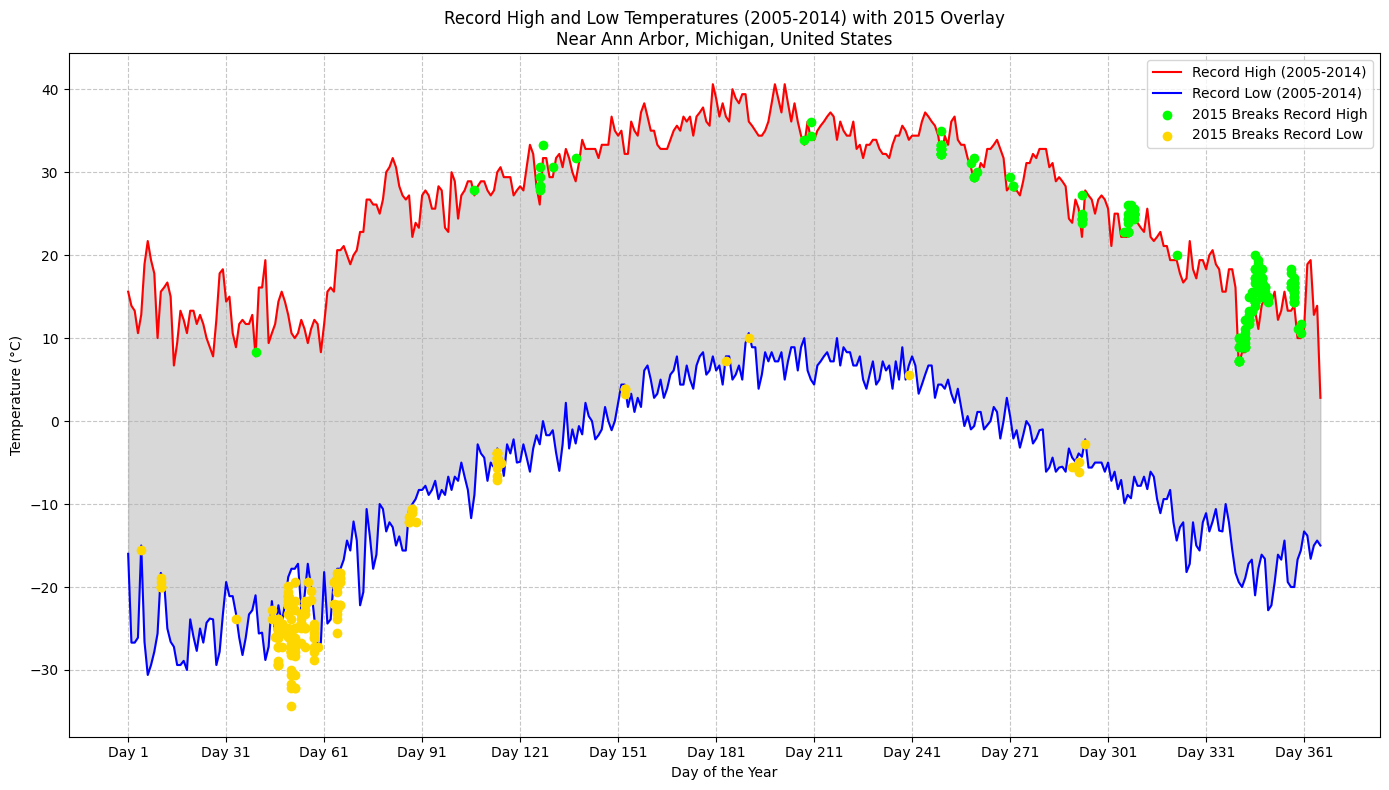

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Automatically use the file named "Temp_Cleaned.tsv" in the script's directory
file_path = os.path.join(os.getcwd(), 'Temp_Cleaned.tsv')

# Load the dataset
try:
    df = pd.read_csv(file_path, sep='\t')  # Assuming the file is a TSV (tab-separated values)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure 'Temp_Cleaned.tsv' is in the same directory as the script.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period 2005-2014 and 2015
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)].copy()  # Explicit copy
df_2015 = df[df['Date'].dt.year == 2015].copy()  # Explicit copy

# Add 'DayOfYear' column to both DataFrames
df_2005_2014.loc[:, 'DayOfYear'] = df_2005_2014['Date'].dt.dayofyear
df_2015.loc[:, 'DayOfYear'] = df_2015['Date'].dt.dayofyear

# Group by day of the year and calculate the record high and low temperatures
record_high = df_2005_2014[df_2005_2014['Element'] == 'TMAX'].groupby('DayOfYear')['Temperature(°C)'].max()
record_low = df_2005_2014[df_2005_2014['Element'] == 'TMIN'].groupby('DayOfYear')['Temperature(°C)'].min()

# Prepare 2015 data
df_2015_high = df_2015[df_2015['Element'] == 'TMAX'].set_index('DayOfYear')['Temperature(°C)']
df_2015_low = df_2015[df_2015['Element'] == 'TMIN'].set_index('DayOfYear')['Temperature(°C)']

# Align the indices of 2015 data with the record data
aligned_2015_high, aligned_record_high = df_2015_high.align(record_high, fill_value=np.nan)
aligned_2015_low, aligned_record_low = df_2015_low.align(record_low, fill_value=np.nan)

# Find where 2015 data breaks the record
broken_high = aligned_2015_high[aligned_2015_high > aligned_record_high]
broken_low = aligned_2015_low[aligned_2015_low < aligned_record_low]

# Plotting
plt.figure(figsize=(14, 8))

# Plot record high and low temperatures
plt.plot(record_high.index, record_high, color='red', label='Record High (2005-2014)')
plt.plot(record_low.index, record_low, color='blue', label='Record Low (2005-2014)')

# Shade the area between record high and low
plt.fill_between(record_high.index, record_high, record_low, color='grey', alpha=0.3)

# Overlay 2015 data points where records were broken
plt.scatter(broken_high.index, broken_high, color='lime', label='2015 Breaks Record High', zorder=5)
plt.scatter(broken_low.index, broken_low, color='gold', label='2015 Breaks Record Low', zorder=5)

# Formatting the plot
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Overlay\nNear Ann Arbor, Michigan, United States')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 366, 30), [f'Day {i}' for i in np.arange(1, 366, 30)])
plt.tight_layout()

# Show the plot
plt.show()

**1. Data Conversion**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

*Converts the 'Date' column to a datetime object, which is necessary for subsequent date-based filtering and operations.*



**2. Data Filtering**

In [ ]:
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
df_2015 = df[df['Date'].dt.year == 2015]

*Splits the data into two subsets: one for the period 2005-2014 (for record calculations) and one for 2015 (to identify record-breaking observations).*

**3. Aggregation (Record Highs and Lows)**

In [ ]:
df_2005_2014.loc[:, 'DayOfYear'] = df_2005_2014['Date'].dt.dayofyear
record_high = df_2005_2014[df_2005_2014['Element'] == 'TMAX'].groupby('DayOfYear')['Temperature(°C)'].max()
record_low = df_2005_2014[df_2005_2014['Element'] == 'TMIN'].groupby('DayOfYear')['Temperature(°C)'].min()

*Calculates the day of the year for each record in 2005-2014, then groups the data by day to find the maximum temperature (record high) and the minimum temperature (record low) for each day.*

**4. Prepare 2015 Data**

In [ ]:
df_2015.loc[:, 'DayOfYear'] = df_2015['Date'].dt.dayofyear
df_2015_high = df_2015[df_2015['Element'] == 'TMAX'].set_index('DayOfYear')['Temperature(°C)']
df_2015_low = df_2015[df_2015['Element'] == 'TMIN'].set_index('DayOfYear')['Temperature(°C)']

*For 2015, computes the day of the year and creates separate series for maximum and minimum temperatures, setting the day as the index to align with the record data.*

**5. Align Data and Identify Record Breakers**

In [ ]:
aligned_2015_high, aligned_record_high = df_2015_high.align(record_high, fill_value=np.nan)
aligned_2015_low, aligned_record_low = df_2015_low.align(record_low, fill_value=np.nan)

broken_high = aligned_2015_high[aligned_2015_high > aligned_record_high]
broken_low = aligned_2015_low[aligned_2015_low < aligned_record_low]

*Aligns the 2015 data with the record data from 2005-2014 and then identifies the days where 2015 temperatures exceed the record high or fall below the record low.*

**6. Plotting**

In [ ]:
plt.figure(figsize=(14, 8))

plt.plot(record_high.index, record_high, color='red', label='Record High (2005-2014)')
plt.plot(record_low.index, record_low, color='blue', label='Record Low (2005-2014)')

plt.fill_between(record_high.index, record_high, record_low, color='grey', alpha=0.3)

plt.scatter(broken_high.index, broken_high, color='lime', label='2015 Breaks Record High', zorder=5)
plt.scatter(broken_low.index, broken_low, color='gold', label='2015 Breaks Record Low', zorder=5)

*Plots the record high and low temperatures as line graphs, shades the area between them, and overlays scatter plots for the 2015 record-breaking data points.*

**7. Plot Formatting and Display**

In [ ]:
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Overlay\nNear Ann Arbor, Michigan, United States')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 366, 30), [f'Day {i}' for i in np.arange(1, 366, 30)])
plt.tight_layout()
plt.show()

# Important Modules


1. **pandas (pd)**  
   - *Purpose:* To handle and manipulate the dataset efficiently.  
   - *Usage:*  
     - Reading the TSV file into a DataFrame.  
     - Converting the date column to a datetime format.  
     - Grouping data and calculating statistics like maximum and minimum temperatures.  
   - *Out-of-Box Insight:*  
     - pd.to_datetime() is crucial for filtering data by year and extracting the day of the year.

2. **matplotlib.pyplot (plt)**  
   - *Purpose:* To create visualizations for temperature trends.  
   - *Usage:*  
     - Plotting the record highs and lows.  
     - Adding scatter points for record-breaking events.  
     - Shading the area between records for better visualization.  
   - *Out-of-Box Insight:*  
     - The use of plt.fill_between() enhances the visual clarity of the temperature range.

3. **numpy (np)**  
   - *Purpose:* To handle numerical computations and missing data.  
   - *Usage:*  
     - Aligning indices of 2015 temperature data with historical records.  
     - Replacing missing values with np.nan for consistent comparisons.  
   - *Out-of-Box Insight:*  
     - np.nan is critical when working with potentially incomplete daily records.

4. **os**  
   - *Purpose:* To work with file paths dynamically.  
   - *Usage:*  
     - Generating the file path relative to the script's directory.  
   - *Out-of-Box Insight:*  
     - This ensures compatibility across different operating systems without hardcoding paths.